## FIT5201 - Machine Learning Assessment 2 - Question 2

- Student Name : Keerthana Muralitharan
- Student ID : 30159474

### Part B. Neural Network vs. Perceptron

**Note** - based on the different epoch values and initial weight values we would get different results.Below analysis is made on one particular set of values.

In [1]:
#importing the libraries 
library(ggplot2)  #plotting the graphs
library(reshape)

## Question 2 [Neural Network’s Decision Boundary, 30 Marks]


 I. Load Task2B_train.csv and Task2B_test.csv sets, plot the training data with classes are marked with different colors, and attach the plot to your PDF report.

In [2]:
#Reading the test and train data from the csv files.
train_data <- read.csv('Task2B_train.csv')
test_data <- read.csv('Task2B_test.csv')

In [3]:
cat("Snippet of the train dataset:\n")
head(train_data)

cat("Snippet of the test dataset:\n")
head(test_data)

Snippet of the train dataset:


x1,x2,y
-0.4365731,0.31994476,0
-0.3351625,-0.60774359,1
0.8914051,-0.11175734,1
-0.1892440,0.83644710,1
0.9231484,0.60879178,1
-0.8316286,-0.09605136,1


Snippet of the test dataset:


x1,x2,y
0.4973951,-0.5492695,1
0.2139925,0.6141635,0
-0.4656182,0.5093878,1
-0.1380630,0.8841224,1
0.6593270,0.3378901,1
0.6670054,0.6012369,1


Warning message:
"Removed 2500 rows containing missing values (geom_point)."


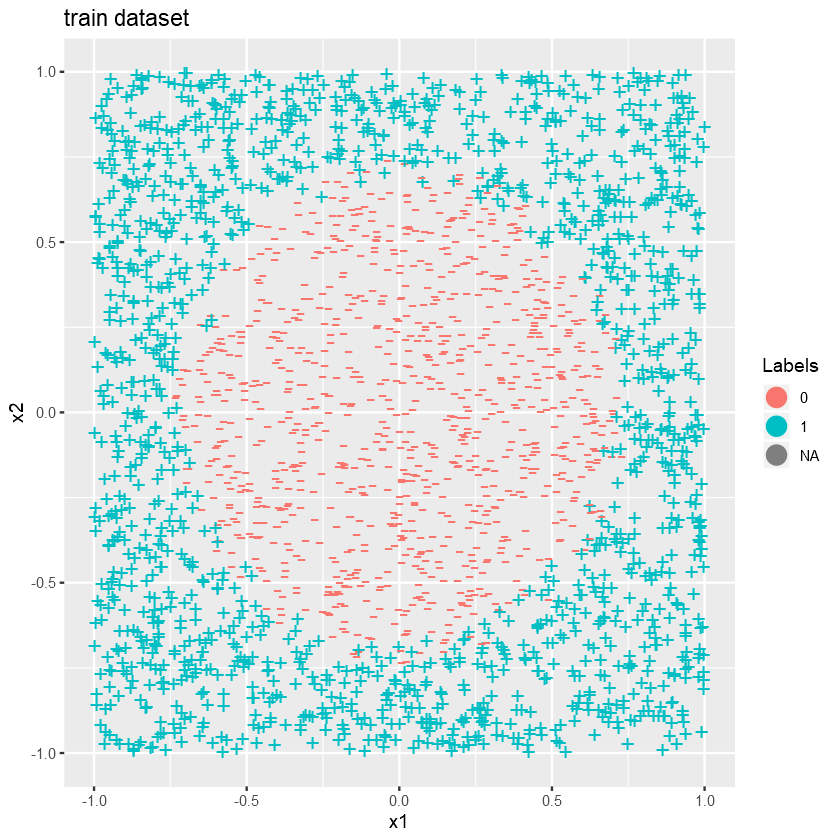

In [4]:
label = ifelse(as.numeric(train_data$y)==1,'+','-')
#ploting the graph based on the classes for the train data
ggplot(train_data, aes(x1, x2, color = factor(train_data$y))) + geom_point(shape = label, size = 5) + 
ggtitle("train dataset") + 
guides(colour=guide_legend(title="Labels"))

### Question 2:

II. Train two perceptron models on the loaded training data by setting the learning rates η to .01 and .09 respectively, using a code from Activity 3.1. Calculate the test errors of two models and find the best η and its corresponding model, then plot the test data while the points are colored with their estimated class labels using the best model that you have selected; attach the plot to your PDF report.

In [5]:
# reading the data
read.data <- function(file.name, scaling=FALSE) {
  data <- read.csv(file=file.name,head=TRUE,sep=",")
  data <- data[complete.cases(data),] # removes rows with NA values
  D <- ncol(data)
  x = data[,-D]
  y = data[,D]
  if (isTRUE(scaling)) {
    x = scale(x)
    y = scale(y)
  }
  return (list('x' = x, 'y' = y))
}

In [6]:
## The following structure helps us to have functions with multiple outputs
list <- structure(NA,class="result")
"[<-.result" <- function(x,...,value) {
  args <- as.list(match.call())
  args <- args[-c(1:2,length(args))]
  length(value) <- length(args)
  for(i in seq(along=args)) {
    a <- args[[i]]
    if(!missing(a)) eval.parent(substitute(a <- v,list(a=a,v=value[[i]])))
  }
  x
}

In [7]:
# Read the datasets
set.seed(123)          # set random seed
list[X1,T1] <- read.data('Task2B_train.csv') # read training data
T1[T1==0] <- -1         # convert 0 labels to -1 
list[X2,T2] <- read.data('Task2B_test.csv') # read test data
T2[T2==0] <- -1         # convert 0 labels to -1 

In [8]:
# prediction
perceptron.predict <- function(Phi, W){
  return(ifelse(Phi%*%W>=0, +1, -1))
}


In [9]:
#Missclassification Error
is.a.miss <- function(Phi, W, T1){
  return((W%*%Phi)*T1<0) #update the weight vector
}

#Calculating the error
error.rate <- function(Y1, T1){
  if (length(Y1)!=length(T1)){
    stop('error.rate: size of true lables and predicted labels mismatch')
  }
  return (sum(T1!=Y1)/length(T1))
}

In [10]:
#Perceptron Build function
#eta value is updated from the function call
perceptron.build <- function(X1, T1, eta, epsilon=0.001, tau.max, plotting=FALSE){

  if (length(unique(T1))!=2){
    stop("Perceptron: The input data is not a binary classification problem.")
  }
  if (all(sort(unique(T1)) != c(-1, 1))) {
    stop("Perceptron: The labels are not (-1, +1).")
  }
  
  N1 <- nrow(X1)
  Phi <- as.matrix(cbind(1, X1)) # add a column of 1 as phi_0

  W <- matrix(NA,nrow=tau.max, ncol=ncol(Phi)) # Empty Weight vector
  W[1,] <- 2*runif(ncol(Phi))-1 # Random initial values for weight vector
  error.rec <- matrix(NA,nrow=tau.max, ncol=1) # Placeholder for errors
  error.rec[1] <- error.rate(perceptron.predict(Phi, W[1,]), T1) # record error for initial weights
  tau <- 1 # iteration counter 
  terminate <- FALSE # termination status
  
  while(!terminate){
    # resuffling train data and associated labels:
    indx <- sample(1:N1, replace = FALSE)
    Phi <- Phi[indx,]
    T1 <- T1[indx]
    
    for (i in 1:N1){
      if (tau >= tau.max) {break}
      # look for missclassified samples
      if (is.a.miss(Phi[i,], W[tau,], T1[i])){
        tau <- tau +1                                 # update tau counter
        W[tau,] <- W[tau-1,] + eta * Phi[i,] * T1[i]  # update the weights
        error.rec[tau] <- error.rate(perceptron.predict(Phi, W[tau,]), T1)# update the records
        eta = eta * 0.99                                 # decrease eta
      } 
    }
    
    # recalculate termination conditions
    terminate <- tau >= tau.max | (abs(error.rec[tau] - error.rec[tau-1]) <= epsilon )
    
  }
  if (plotting){
    plot(error.rec[complete.cases(error.rec),], xlab = 'tau', ylab = 'error', main = 'Perceptron')
  }
  W <- W[complete.cases(W),]  # cut the empty part of the matrix (when the loop stops before tau == tau.max)
  return(W[nrow(W),])         # return the last wight vector
}


#### Justification to choose the best learning rate.
The perceptron model is built and ran **50** times to find the best learning rate values based on the **average** of the errors calculated for both the models.


In [11]:
# Build a perceptron and plot its train error curve

error_0.01<- NULL
error_0.09 <- NULL
Phi_x2 <- as.matrix(cbind(1, X2)) # add a column of 1 as phi_0

for (i in 0:50){
W1 <- perceptron.build(X1, T1, eta=0.01,tau.max=1000,plotting = FALSE) # Run this a few times until you are happy with the result
W2 <- perceptron.build(X1, T1, eta=0.09,tau.max=1000, plotting = FALSE)

label.01 = perceptron.predict(Phi_x2, W1)
label.09 = perceptron.predict(Phi_x2, W2)

error_0.01=append(error_0.01,error.rate(label.01, T2))
error_0.09=append(error_0.09,error.rate(label.09, T2))
    }

In [12]:
print("Mean Error rate - 0.01")
mean(error_0.01)
print("Mean Error rate - 0.09")
mean(error_0.09)

[1] "Mean Error rate - 0.01"


[1] 0.5199608

[1] "Mean Error rate - 0.09"


[1] 0.5022353

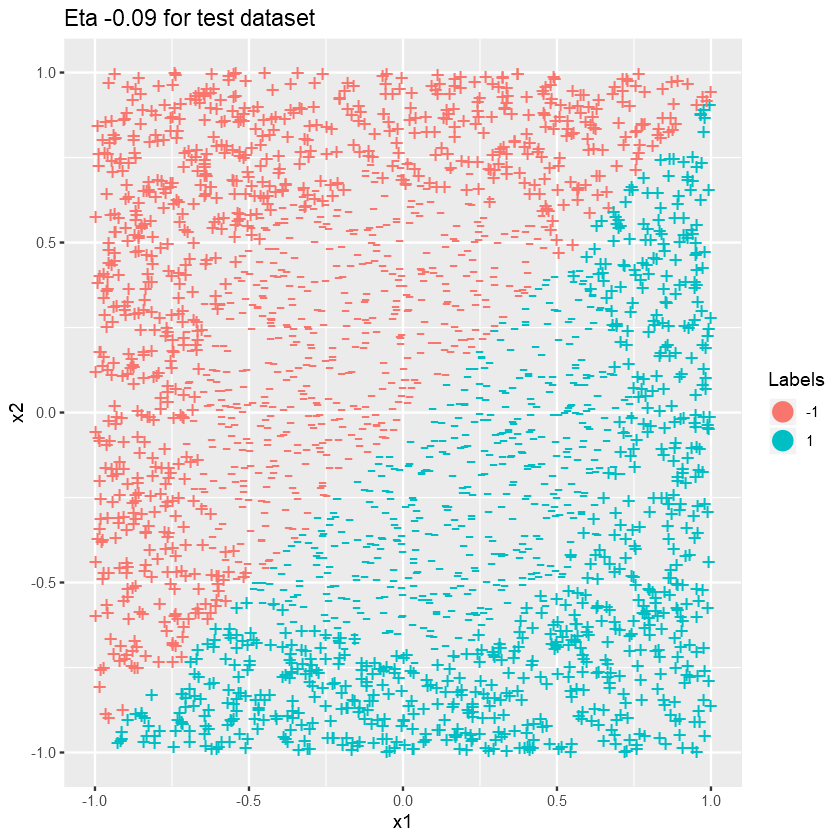

In [13]:
error.09 <- data.frame(X2,label.09, T2)
label = ifelse(T2==1,'+','-')

#plotting the eta 0.09 on the test dataset
ggplot(error.09, aes(x=x1, y=x2, color = factor(label.09))) + geom_point(shape = label, size = 5) +
ggtitle("Eta -0.09 for test dataset") + 
guides(colour=guide_legend(title="Labels"))

**Inference** : Based on the errors for both the learning rates, It is found that the best model is built with higher learning rate – (0.09).Perceptron is a linear decision boundary, so it does not match with the data.

### Question 3:

For each combination of K (i.e, number of units in the hidden layer) in {5, 10, 15, …, 100} and μ (learning rate) in {0.01, 0.09}, run the 3-layer Neural Network given to you in Activity 5.1 and record testing error for each of them (40 models will be developed, based on all possible combinations). Plot the error for μ 0.01 and 0.09 vs K (one line for μ 0.01 and another line for μ 0.09 in a plot) and attach it to your PDF report. Based on this plot, find the best combination of K and μ and the corresponding model, then plot the test data while the points are colored with their estimated class labels using the best model that you have selected; attach the plot to your PDF report.

In [16]:
## the activation function (tanh here)
h <- function(z) { 
  return ((exp(z)-exp(-z))/(exp(z)+exp(-z)))
}


In [17]:
## the derivitive of the activation function (tanh here)
h.d <- function(z) {
return (1-(h(z))^2)
}

In [18]:
## Class Probabilities
class.prob <- function(X, W1, W2, b1, b2){
  a2 <- h(sweep(W1 %*% X, 1, b1,'+' ))
  a3 <- h(sweep(W2 %*% a2, 1, b2,'+' ))
  return (a3)
}

In [19]:
## prediction
nn.predict <- function(X, W1, W2, b1, b2, threshold=0){
  return (ifelse(class.prob(X, W1, W2, b1, b2)>=threshold, 1, -1))
}

In [20]:
## feedforward step
feedforward <- function(Xi, Ti, W1, b1, W2, b2){
  ### 1st (input) layer 
  a1 <- Xi
  y <- Ti
  ### 2nd (hidden) layer
  z2 <- W1 %*% a1 + b1
  a2 <- h(z2)        
  ### 3rd (output) layer
  z3 <- W2 %*% a2 + b2
  a3 <- h(z3)  
  return(list(a1, a2, a3, y, z2, z3))
}

In [21]:
## backpropagation step
backpropagation <- function(Ti, W2, z2, z3, a3){
  ### 3rd (output) layer
  d3 <- -(Ti-a3) * h.d(z3)
  ### 2nd (hidden) layer
  d2 <-  t(W2)%*%d3  * h.d (z2)
  return(list(d2,d3))
}

In [77]:

## NN build function
nn.build <- function(K, X1, T1, plotting=FALSE, epoch.max=3, eta, lambda = 0.01){
  # initialization
  if (plotting) {error.rec <- matrix(NA,nrow=epoch.max, ncol=1)}
  D <- nrow(X1)
  if (D!=2) {stop('nn.predict: This simple version only accepts two dimensional data.')}
  N <- ncol(X1)

  W1 <- matrix(rnorm(D*K, sd=0.5), nrow=K, ncol=D)
  b1 <- matrix(rnorm(1*K), nrow=K, ncol=1)
  W2 <- matrix(rnorm(K*1, sd=0.5), nrow=1, ncol=K)
  b2 <- matrix(rnorm(1*1), nrow=1, ncol=1)

  for (epoch in 1:epoch.max){   
    ## delta vectors/matrices initialization
    W1.d <- W1 *0
    b1.d <- b1 *0
    W2.d <- W2 *0
    b2.d <- b2 *0

    for (i in 1:N){
      ## Feedforward:
      list[a1, a2, a3, y, z2, z3] <- feedforward(X1[,i], T1[i], W1, b1, W2, b2)          
      ## Backpropagation:
      list[d2, d3] <- backpropagation(T1[i], W2, z2, z3, a3)
      ## calculate the delta values
      ### 1st layer
      W1.d <- W1.d + d2 %*% t(a1)
      b1.d <- b1.d + d2
      ### 2nd layer
      W2.d <- W2.d + d3 %*% t(a2)
      b2.d <- b2.d + d3
    }
    ## update weight vectors and matrices
    W1 <- W1 - eta * (W1.d/N + lambda*W1)
    b1 <- b1 - eta * (b1.d/N)
    W2 <- W2 - eta * (W2.d/N + lambda*W2)
    b2 <- b2 - eta * (b2.d/N)
    ## record the errors
    #if (plotting){error.rec[epoch]<- error.rate(nn.predict(X1, W1, W2, b1, b2), T1)}
  }

    return(list(W1, W2, b1, b2))}



In [86]:
#transposing the matrix
X1.t <- t(as.matrix(X1)) 
X2.t <- t(as.matrix(X2))

In [23]:
#Calculating the train and test errors for the different learning rates (eta- value)
K<- seq(5,100,5)
K.value=NULL
eta.value=NULL
train.error=NULL
test.error=NULL

#for every hidden layer 
for ( k in K){
    
      #Building the NN model and predict and calculate the error for eta=0.09
      list[W1, W2, b1, b2]<- nn.build(k, X1.t, T1, plotting=TRUE, epoch.max=100, eta = 0.09, lambda = 0.01)
      K.value=append(K.value,k)
      eta.value=append(eta.value,0.09)
      train.error=append(train.error,error.rate(nn.predict(X1.t,W1,W2,b1,b2),T1))
      test.error=append(test.error,error.rate(nn.predict(X2.t,W1,W2,b1,b2),T2))
    
      #Building the NN model and predict and calculate the error for eta=0.01
      list[W1, W2, b1, b2]<- nn.build(k, X1.t, T1, plotting=TRUE, epoch.max=100, eta = 0.01, lambda = 0.01)
      K.value=append(K.value,k)
      eta.value=append(eta.value,0.01)
      train.error=append(train.error,error.rate(nn.predict(X1.t,W1,W2,b1,b2),T1))
      test.error=append(test.error,error.rate(nn.predict(X2.t,W1,W2,b1,b2),T2))
}

#storing the test and train error for correpopnding K and eta value
error=data.frame(K.value,eta.value,train.error,test.error)
test_error = subset(error, select = -c(3) )
train_error = subset(error, select = -c(4) )

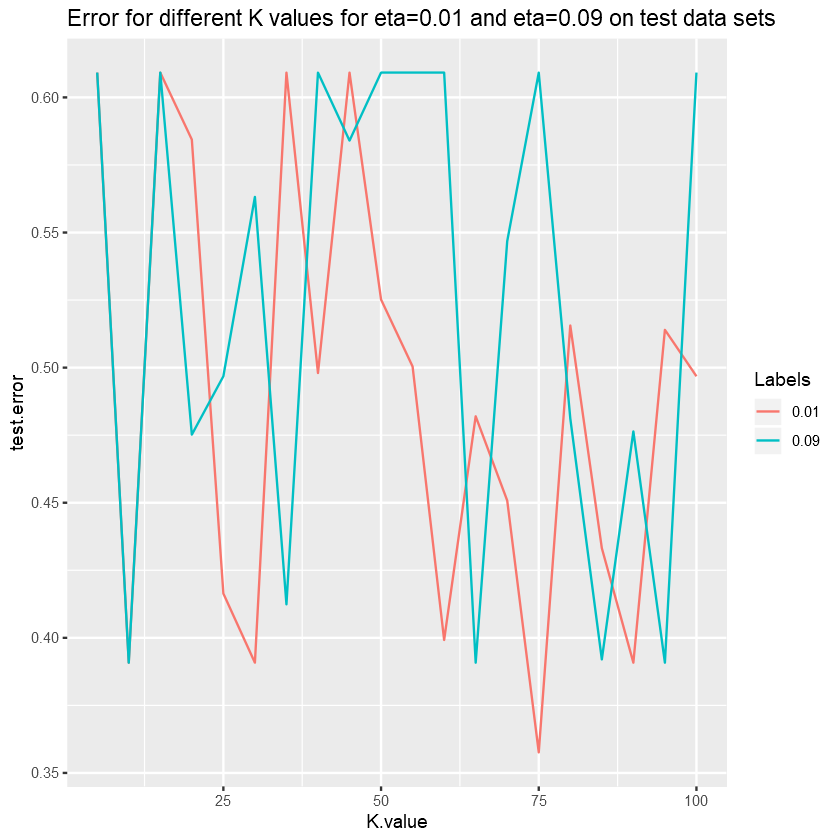

In [63]:
#Plotting the error graph
ggplot(data=test_error, aes(x=K.value, y=test.error, color=factor(eta.value))) + geom_line()  + 
ggtitle("Error for different K values for eta=0.01 and eta=0.09 on test data sets") + guides(colour=guide_legend(title="Labels"))

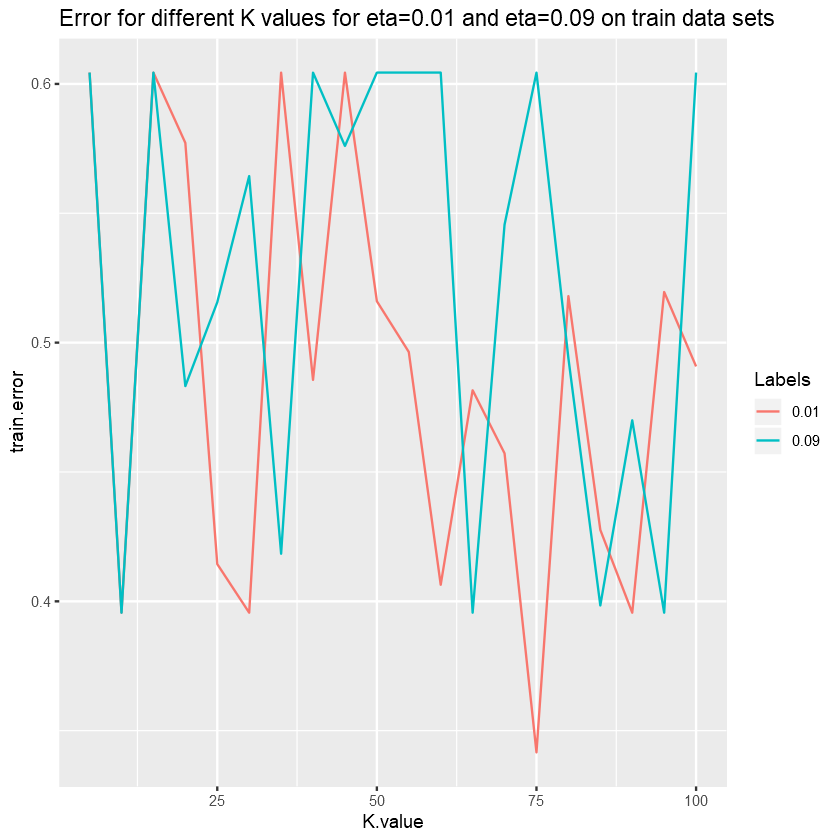

In [64]:
#Plotting the training data errors
ggplot(data=train_error, aes(x=K.value, y=train.error, color=factor(eta.value))) + geom_line() + ggtitle("Error for different K values for eta=0.01 and eta=0.09 on train data sets") + guides(colour=guide_legend(title="Labels"))

In [91]:
#Building the model for best K  value (75) and eta value (0.01)
list[W1, W2, b1, b2]<- nn.build(K=75, X1.t, T1, plotting=FALSE, epoch.max=100, eta = 0.01, lambda = 0.01)
label_nn.01 = nn.predict(X2.t,W1,W2,b1,b2)


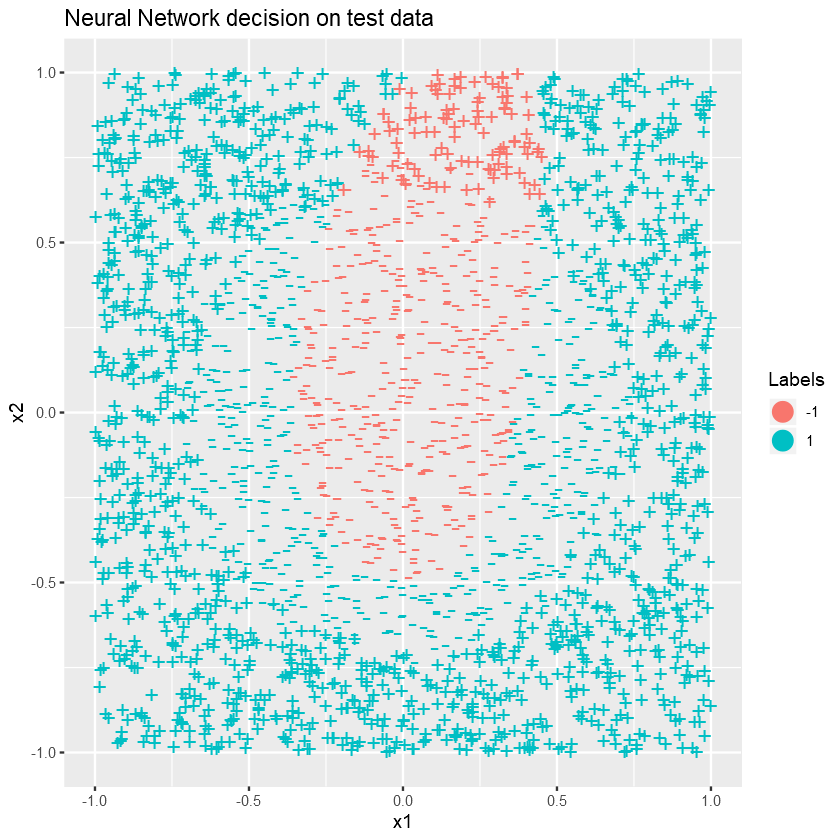

In [101]:
label = as.character(ifelse((T2==1),'+','-'))
error_nn.01 <- data.frame(X2,label_nn.01, T2)
#Plotting the graph on Neural networks for the best model
ggplot(X2, aes(x1, x2, color = factor(label_nn.01))) + geom_point(shape = label, size = 5.1) + 
ggtitle("Neural Network decision on test data") + 
guides(colour=guide_legend(title="Labels"))

**Inference** :  For the test dataset the best model for K and Mu is 75 and 0.01 respectively as it has the least error. The epoch value is set at 100 as it converges at this value. Since it is a non-linear decision boundary it would match with the data and similar to the dataset.

##### Question IV.
In your PDF report, explain the reason(s) responsible for such difference between perceptron and a 3-layer NN by comparing the plots you generated in Steps II and III. 

Inference : Here Perceptron is a linear decision boundary , while the 3-layer NN is Neural network decision boundary which is non-linear  decision boundary. This is the main reason for which the data will not match for the perceptron and it would match to the original data with the neural networks


### References

https://stat.ethz.ch/pipermail/r-help/2004-June/053343.html 